De acordo o artigo publicado no NIH - Nation institute of Diabetes  and Digestive and Kidney Diseases

" estima-se que 38,4 milhões de pessoas nos Estados Unidos, ou 11,6% da população, tenham diabetes.
Cerca de 1 em cada 5 adultos com diabetes não sabe que tem a doença. Estima-se que 97,6 milhões de
adultos americanos tenham pré-diabetes, o que significa que os seus níveis de glicose no sangue são
superiores ao normal, mas não suficientemente elevados para serem diagnosticados como diabetes."

O que ocasiona que nesse projeto de dados utilizando o dataset(conjunto de dados) diabetes.csv, 
onde iremos utilizar as seguintes ferramentas para realizar a manipulação dos dados e fazer
o treinamento e teste de modelo de machine learning para relizar diagnostico de diabetes baseados
nesse dataset obtido no site kaggle ('https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset')

Ferramentas utilizadas
- VSCode / editor de código 
- Python / linguagem de programação
    * Bibliotecas
    - Pandas / para manipulação dos dados e transformalos em data frame para melhor visulização e manipulação
    - Sklern (Scikit-learn) / para aprendizado de máquinas

In [1]:
# Importando a biblioteca pandas para manipulação dos dados
# Criando a váriavel df_diabetes e utilizando o método read_csv para ler o arquivo 'diabetes.csv'
import pandas as pd
df_diabetes = pd.read_csv('diabetes.csv')

In [2]:
# Vericiando as 5 primeiras linhas do dataframe com o método head 
df_diabetes.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Utilizando o método info para vericiar o número de linhas, tipos de dados e se tem valores faltando 
# No caso em questão, temos 768 linhas, nenhum valor faltando e dados do tipo int  e float
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Pulando para o modelo RandomForestClassifier
# Importando traino e teste, procedimento padrão para todos os modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [5]:
# Dropando a coluna 'Outcome' com o método drop e o parametro 'axis=' para o programa entender que é uma coluna
# x vai armazenar apenas as váriaveis e y irá armazenar as variáveis respostas
x = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

In [6]:
# Dividir em treino e teste
# no test_size=0.2, será definido a proporção para teste, que será de 20 porcento para teste e 80 porcento para treino
#  random_state para replicar essa divisão toda vez que ela for chamada, será replicada da mesma forma
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [7]:
# Iniciando a utilização do RandomForestClassifier para treinamento 
# Instanciando primeiramente o RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [8]:
# Dando fit para treinar o modelo 
# Dando o x_train de treino e o y_train com as respostas 
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [11]:
# Realizando a predição do x_test
y_predict = rfc.predict(x_test)

In [12]:
# Para cada x_test o modelo irá "julgar" se a pessoa tem ou não diabetes, que está armazenado no y_predict
# Porém os dados reais estão armazenados no y_test
y_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [13]:
# Utilizando métricas para verificar a taxa de acerto entre o y_test e o y_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [14]:
# Utilizando a accuracy_score e passando o  y_test e o y_predict e recebendo um score de acorto de 74%
accuracy_score(y_test, y_predict)

0.7402597402597403

In [15]:
# Deixando o valor mais apresentavel, formando com f string
print(f'Acurárcia:{round(accuracy_score(y_test, y_predict)*100, 2)}%')
print(f'Recall:{round(recall_score(y_test, y_predict)*100, 2)}%')
print(f'Precision:{round(precision_score(y_test, y_predict)*100, 2)}%')

Acurárcia:74.03%
Recall:49.15%
Precision:74.36%


In [16]:
# Vericiando a proporção de quem tem ou não tem diabétes
# com acurácia de 74,03% e uma taxa de 65% de pessoas que não tem diábete, o modelo de forma básica já exibiu bons resultados
# Resultados esses que podem ser melhorados com tuning e outros métodos...
df_diabetes.Outcome.value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [17]:
x_acur = accuracy_score(y_test, y_predict)
y_pred = precision_score(y_test, y_predict)

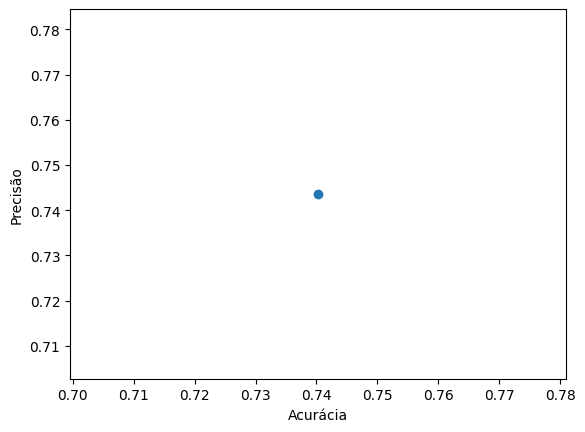

In [18]:
# Plotando de forma simples no gráfico a acurácia e a precisão com matplotlib, podendo ser aperfeiçoado.
import matplotlib.pyplot as plt
plt.scatter(x_acur, y_pred)
plt.xlabel('Acurácia')
plt.ylabel('Precisão')
plt.show()